In [6]:
#SOCIAL MEDIA ACTIVITY STARTS HERE
import praw
import csv
from datetime import datetime
import pandas as pd
import config
reddit = praw.Reddit(client_id=config.reddit_id, \
                     client_secret=config.reddit_secret, \
                     user_agent=config.reddit_user_agent)

#Task 1
posts =  reddit.subreddit('dataisbeautiful').top(limit=100)

average_tuple = []
for submission in posts:  
    average_tuple.append(submission.score)
    
with open('average_score.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Average score", "Date"])
    for submission.score in average_tuple:
        writer.writerow([submission.score,datetime.now()])

In [7]:
df = pd.read_csv('average_score.csv', parse_dates=['Date'], index_col='Date', encoding = "ISO-8859-1")

In [8]:
df

,Average score
Date,
2019-02-05 12:49:02.626502,101455
2019-02-05 12:49:02.626519,99620
2019-02-05 12:49:02.626525,84418
2019-02-05 12:49:02.626529,76726
2019-02-05 12:49:02.626533,73278
2019-02-05 12:49:02.626538,68849
2019-02-05 12:49:02.626542,67392
2019-02-05 12:49:02.626546,65362
2019-02-05 12:49:02.626550,65007


In [9]:
average_score = df['Average score'].mean()

In [10]:
average_score

47448.48

In [11]:
#Task 2

proportion_score = df.groupby(df['Average score'] > 50000).count()

In [12]:
proportion_score.plot(kind='pie', subplots=True, figsize=(10,10), labels=['Below 50,000', 'Above 50,000'], autopct='%.2f')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c792c50>],
      dtype=object)

In [13]:
#Task 3

posts =  reddit.subreddit('dataisbeautiful').top(limit=100)

comments = []
for submission in posts:  
    comments.append((submission.num_comments)) 
    
with open('comments.csv', 'a') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Comments", "Date"])
    for submission in comments:
        writer.writerow([submission,datetime.now()])

In [14]:
df = pd.read_csv('comments.csv', parse_dates=['Date'], index_col='Date', encoding = "ISO-8859-1")

In [15]:
average_comments = df.Comments.mean()

In [16]:
average_comments

2256.46

In [17]:
#Task 4

posts =  reddit.subreddit('dataisbeautiful').top(limit=100)

gilded = []
for submission in posts:  
    gilded.append((submission.gilded)) 
    
with open('gilded.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Gilded", "Date"])
    for submission in gilded:
        writer.writerow([submission,datetime.now()])

In [18]:
df = pd.read_csv('gilded.csv', parse_dates=['Date'], index_col='Date', encoding = "ISO-8859-1")

In [19]:
posts_gilded = df.groupby(df.Gilded < 1).count()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c0ebcc0>],
      dtype=object)

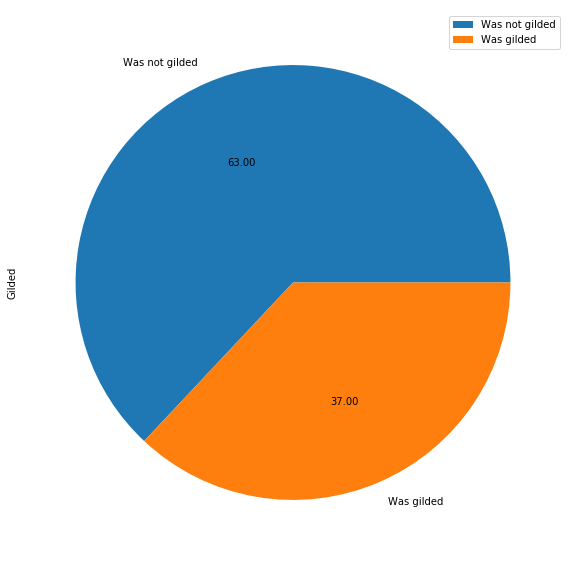

In [20]:
posts_gilded.plot(kind='pie', subplots=True, figsize=(10,10), labels=['Was not gilded', 'Was gilded'], autopct='%.2f')